# Base EDA

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir('train'))

# Any results you write to the current directory are saved as output.

['lpmt_pos.csv', 'spmt_pos.csv', 'train_info.csv', 'train_lpmt_hits.h5', 'train_lpmt_n_hits.csv', 'train_spmt_hits.h5', 'train_spmt_n_hits.csv']


In [2]:
# import libs
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import tables
from random import shuffle
from IPython.display import clear_output
from sklearn import metrics
from tqdm import tqdm
import time
import seaborn as sns
import os
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
lpmt = pd.read_csv('data.csv')

In [4]:
lpmt['is_DN'] = lpmt.isDN.apply(lambda x: 1 if x == True else 0)
event_dn_me = lpmt.groupby('event', as_index = False)['is_DN'].mean()
pmt_dn_me = lpmt.groupby('pmt_id', as_index = False)['is_DN'].mean()
event_dn_me['isDN_me'] = event_dn_me.is_DN.apply(lambda x: round(x,2))
pmt_dn_me['isDN_me'] = pmt_dn_me.is_DN.apply(lambda x: round(x,3))

(array([0]), <a list of 1 Text xticklabel objects>)

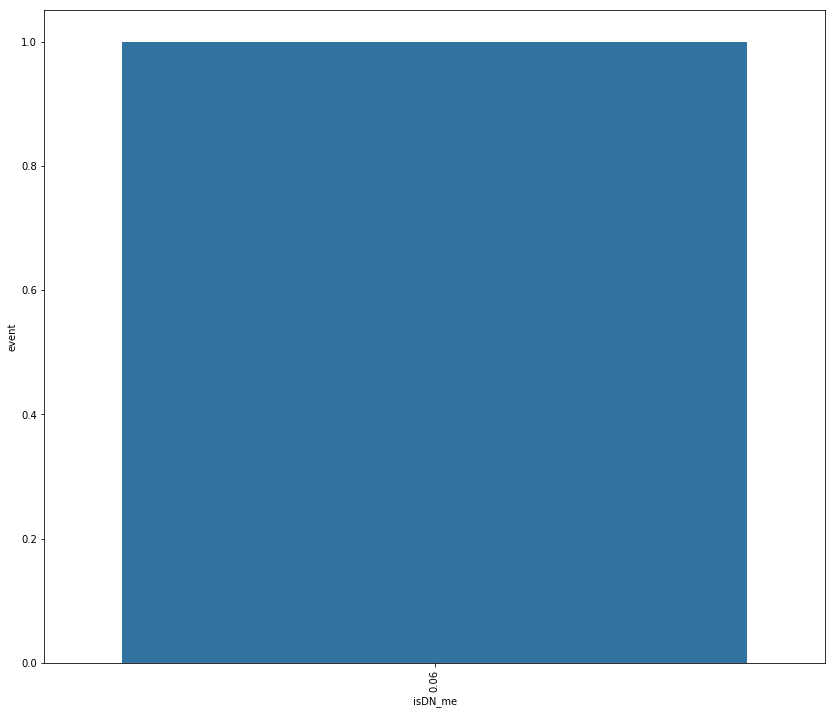

In [5]:
#Посомтрим распределение шума внутри каждого ивэнта
plt.figure(figsize=(14,12))
sns.barplot(x="isDN_me", y="event", data=event_dn_me.groupby('isDN_me', as_index = False)['event'].count())
plt.xticks(rotation=90)
#plt.xticks(x, labels, rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

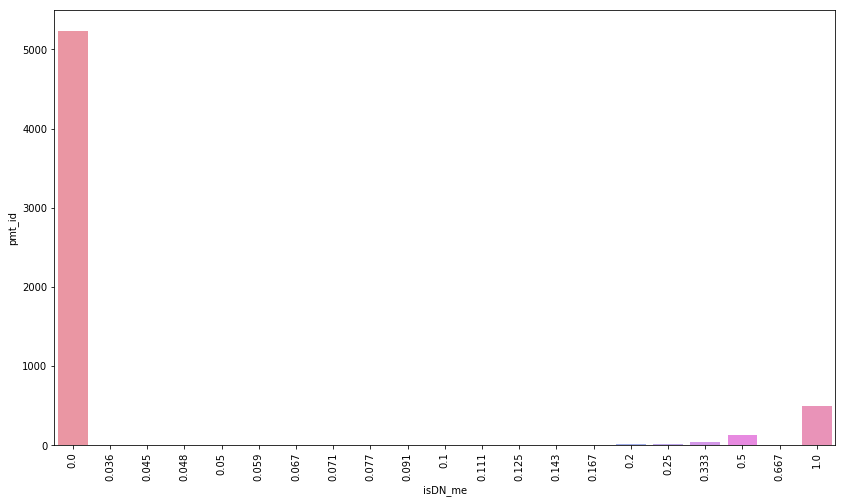

In [6]:
#Доля шума внутри каждого детектора
plt.figure(figsize=(14,8))
sns.barplot(x="isDN_me", y="pmt_id", data=pmt_dn_me.groupby('isDN_me', as_index = False)['pmt_id'].count())
plt.xticks(rotation=90)
#plt.xticks(x, labels, rotation='vertical')
# Судя по всему вероятность шума в детекторе равно 2 нормальным распределениям (:
# Разделим детекторы на 2 класса (из распределения 1 и из распределеня 2)

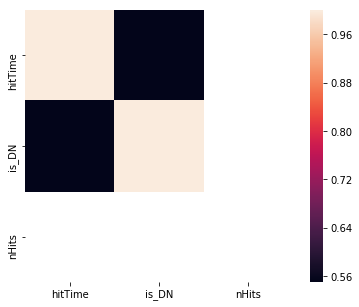

In [9]:
#Корреляция времени с шумом и количеством детектирований
plt.figure(figsize=(6,5))
sns.heatmap(lpmt[['hitTime','is_DN','nHits']].corr())

In [10]:
data_color_1_is_DN_1 = pd.merge(lpmt[lpmt.isDN == 1],pmt_dn_me[pmt_dn_me.color == 1],on='pmt_id',how = 'inner')
data_color_1_is_DN_0 = pd.merge(lpmt[lpmt.isDN == 0],pmt_dn_me[pmt_dn_me.color == 1],on='pmt_id',how = 'inner')
data_color_0_is_DN_1 = pd.merge(lpmt[lpmt.isDN == 1],pmt_dn_me[pmt_dn_me.color == 0],on='pmt_id',how = 'inner')
data_color_0_is_DN_0 = pd.merge(lpmt[lpmt.isDN == 0],pmt_dn_me[pmt_dn_me.color == 0],on='pmt_id',how = 'inner')

In [11]:
data_color_1_is_DN_1.shape

(1, 13)

In [12]:
data_color_1_is_DN_0.shape

(11156, 13)

In [13]:
data_color_0_is_DN_1.shape

(735, 13)

In [14]:
data_color_0_is_DN_0.shape

(574, 13)

In [15]:
data_color_1_is_DN_1['ht'] = data_color_1_is_DN_1.hitTime.apply(lambda x: round(x))
data_color_1_is_DN_0['ht'] = data_color_1_is_DN_0.hitTime.apply(lambda x: round(x))
data_color_0_is_DN_1['ht'] = data_color_0_is_DN_1.hitTime.apply(lambda x: round(x))
data_color_0_is_DN_0['ht'] = data_color_0_is_DN_0.hitTime.apply(lambda x: round(x))

In [16]:
gr11 = data_color_1_is_DN_1.groupby('ht',as_index =False)['pmt_id'].count()
gr10 = data_color_1_is_DN_0.groupby('ht',as_index =False)['pmt_id'].count()
gr01 = data_color_0_is_DN_1.groupby('ht',as_index =False)['pmt_id'].count()
gr00 = data_color_0_is_DN_0.groupby('ht',as_index =False)['pmt_id'].count()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

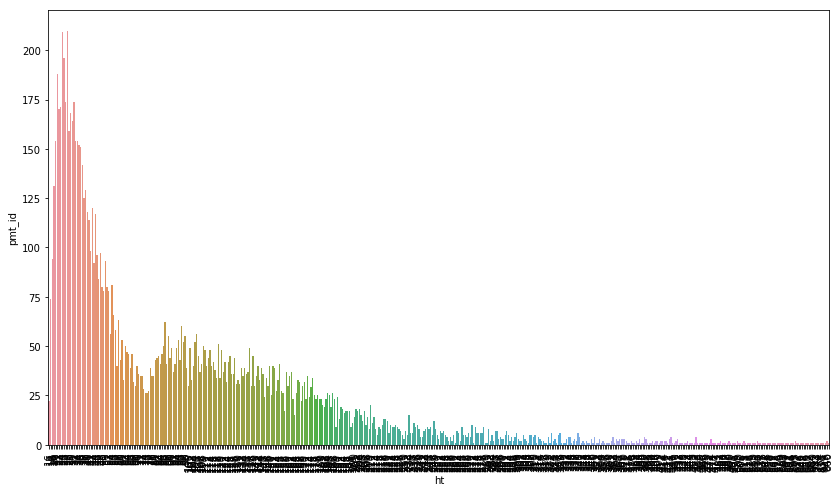

In [17]:
#Распределение времени отклика для нешумовых событий в детекторах класса 1
plt.figure(figsize=(14,8))
sns.barplot(x="ht", y="pmt_id", data=gr10)
plt.xticks(rotation=90)
# они приходят к нам из гамма распределения

(array([0]), <a list of 1 Text xticklabel objects>)

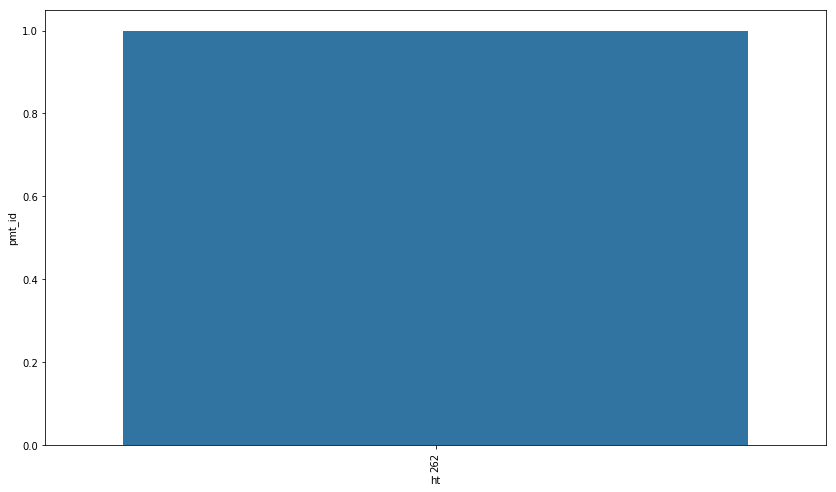

In [18]:
# Распределение времени отклика для шумовых событий в детекторах класса 1
plt.figure(figsize=(14,8))
sns.barplot(x="ht", y="pmt_id", data=gr11)
plt.xticks(rotation=90)
# Ну а шум как и положено по науке из равномерного распределния

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

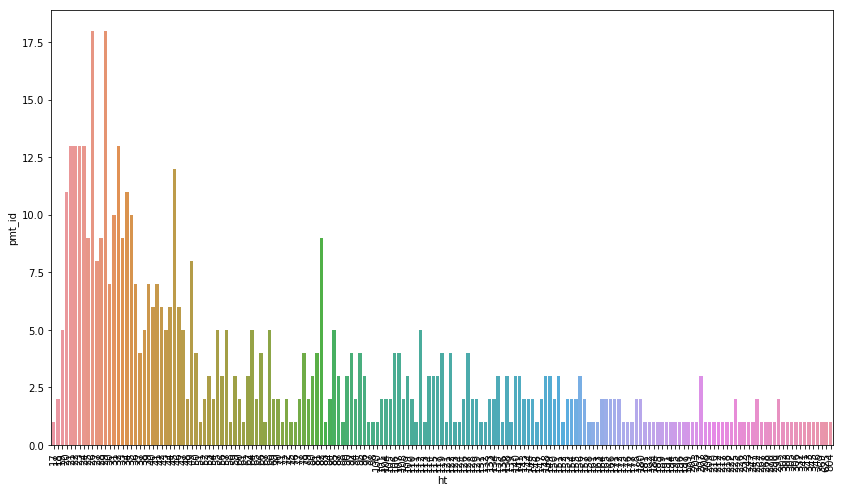

In [19]:
#Распределение времени отклика для нешумовых событий в детекторах класса 0
plt.figure(figsize=(14,8))
sns.barplot(x="ht", y="pmt_id", data=gr00)
plt.xticks(rotation=90)
# они приходят к нам из гамма распределения

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

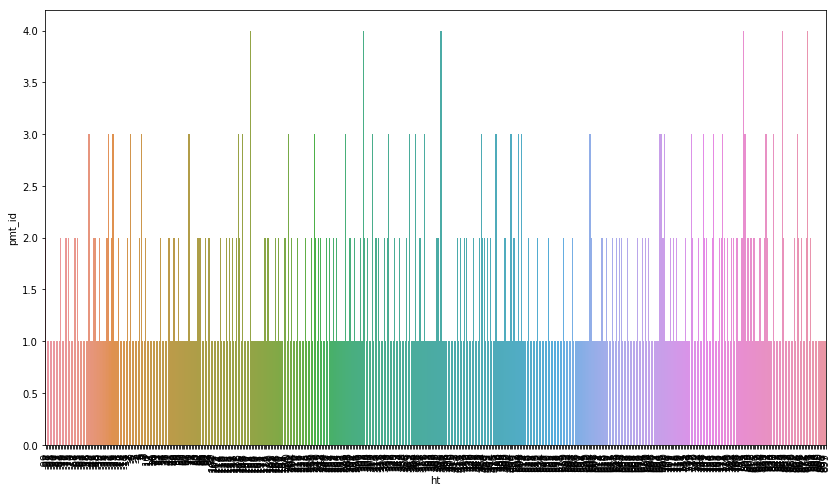

In [20]:
#Распределение времени отклика для нешумовых событий в детекторах класса 0
plt.figure(figsize=(14,8))
sns.barplot(x="ht", y="pmt_id", data=gr01)
plt.xticks(rotation=90)
# они приходят к нам из гамма распределения

In [21]:
# Для классификации шума можно использовать простой статистический критерий принадлежности значения гамма распределению:
# По номеру детектора мы можем определить кластер к которому принадлежит этот детектор,
# далее для этого кластера мы явно знаем распределение шума и не шума.
# Также можно возвращать вероятность шума, а далее чтобы выбрать threshold, мы можем реконсилировать все детекторы на общую ошибку (ведь мы знаем распределение средней ошибки для каждого кластера (2 нормальных горки))